# Classificazione con Regressione Logistica

In questa esercitazione si utilizza un dataset di telecomunicazioni per predire i clienti che rimangono e quelli che abbandonano la compagnia fittizia Telco Churn.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)

display(churn_df.head(10))
print()
display(churn_df.info())

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1.0,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1.0,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0.0,1.0,2.553,3.248,4.143,2.0,0.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float

None

## Preprocessing


In [6]:
# Selezione di alcune features per il modello
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.sample(5)

,tenure,age,address,income,ed,employ,equip,churn
144,45.0,27.0,3.0,39.0,3.0,2.0,0.0,0
141,66.0,62.0,31.0,47.0,2.0,4.0,0.0,0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,0
124,59.0,55.0,29.0,42.0,3.0,21.0,0.0,0
15,4.0,35.0,16.0,161.0,5.0,6.0,1.0,1


In [9]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X_norm = StandardScaler().fit(X).transform(X)  # standardizzazione

y = np.asarray(churn_df['churn'])

X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

## Definizione del modello di Regressione Logistica


In [14]:
LR = LogisticRegression().fit(X_train, y_train)  # addestramento
yhat = LR.predict(X_test)  # predizioni sul test set
yhat_prob = LR.predict_proba(X_test)  # probabilità di ogni esempio di appartenere alle due classi, threshold 0.5
print(yhat_prob[:5])
print()
print(log_loss(y_test, yhat_prob))  # Binary-Cross-Entropy, valori minimi indicano buone performance del modello

[[0.74643946 0.25356054]
 [0.92667894 0.07332106]
 [0.83442627 0.16557373]
 [0.94600618 0.05399382]
 [0.84325532 0.15674468]]

0.6257718410257235



In questo caso particolare, l'obiettivo è predire più accuratamente la classe 1, quindi si può indagare sul ruolo di ciascuna feature nella predizione della classe.


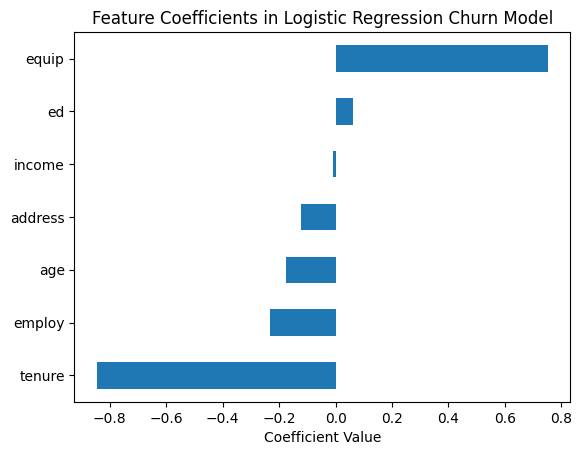

In [12]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()



Il coefficiente LR ci da' le seguenti informazioni:
- valore positivo elevato: aumenta la probabilità di predire la classe positiva.
- valore negativo elevato: aumenta la probabilità di predire la classe negativa.
- piccolo valore assoluto: la variabile non apporta un contributo significativo.


### Come variano le prestazioni in base alle variabili selezionate

In [15]:
# Considero anche la variabile callcard
churn_df = pd.read_csv(url)
Xa = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard']])
ya = np.asarray(churn_df.churn).astype('int')

Xa_norm = StandardScaler().fit(Xa).transform(Xa)
Xa_train, Xa_test, ya_train, ya_test = train_test_split( Xa_norm, ya, test_size=0.2, random_state=4)
LRa = LogisticRegression().fit(Xa_train, ya_train)
yahat = LRa.predict(Xa_test)
yahat_prob = LRa.predict_proba(Xa_test)
log_loss(ya_test, yahat_prob)

0.6039104035600186

In [16]:
# Considero anche la variabile wireless
churn_df = pd.read_csv(url)
Xb = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless']])
yb = np.asarray(churn_df.churn).astype('int')

Xb_norm = StandardScaler().fit(Xb).transform(Xb)
Xb_train, Xb_test, yb_train, yb_test = train_test_split( Xb_norm, yb, test_size=0.2, random_state=4)
LRb = LogisticRegression().fit(Xb_train, yb_train)
ybhat = LRb.predict(Xb_test)
ybhat_prob = LRb.predict_proba(Xb_test)
log_loss(yb_test, ybhat_prob)

0.7227054293985518

In [17]:
# Considero sia callcard che wireless
churn_df = pd.read_csv(url)
Xc = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']])
yc = np.asarray(churn_df.churn).astype('int')

Xc_norm = StandardScaler().fit(Xc).transform(Xc)
Xc_train, Xc_test, yc_train, yc_test = train_test_split( Xc_norm, yc, test_size=0.2, random_state=4)
LRc = LogisticRegression().fit(Xc_train, yc_train)
ychat = LRc.predict(Xc_test)
ychat_prob = LRc.predict_proba(Xc_test)
log_loss(yc_test, ychat_prob)

0.7760557225417115

In [18]:
# Rimuovo la variabile equip
churn_df = pd.read_csv(url)
Xc = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ']])
yc = np.asarray(churn_df.churn).astype('int')

Xc_norm = StandardScaler().fit(Xc).transform(Xc)
Xc_train, Xc_test, yc_train, yc_test = train_test_split( Xc_norm, yc, test_size=0.2, random_state=4)
LRc = LogisticRegression().fit(Xc_train, yc_train)
ychat = LRc.predict(Xc_test)
ychat_prob = LRc.predict_proba(Xc_test)
log_loss(yc_test, ychat_prob)

0.5302427350245369

In [19]:
# Rimuovo le variabili income e employ
churn_df = pd.read_csv(url)
Xc = np.asarray(churn_df[['tenure', 'age', 'address', 'ed']])
yc = np.asarray(churn_df.churn).astype('int')

Xc_norm = StandardScaler().fit(Xc).transform(Xc)
Xc_train, Xc_test, yc_train, yc_test = train_test_split( Xc_norm, yc, test_size=0.2, random_state=4)
LRc = LogisticRegression().fit(Xc_train, yc_train)
ychat = LRc.predict(Xc_test)
ychat_prob = LRc.predict_proba(Xc_test)
log_loss(yc_test, ychat_prob)

0.5597796951214594